In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from scipy import stats

# Limpieza de datos y Análisis exploratorio de datos con Python:

### Autor: Ariel Leyton Cubillos

## Introducción:

Este proyecto representa un análisis detallado de la base de datos de titulados de educación superior en Chile del año 2022, proporcionada por el Centro de Estudios del Ministerio de Educación de Chile.

Página de referencia: https://datosabiertos.mineduc.cl/titulados-en-educacion-superior/

Inicialmente, se procederá a la limpieza y preparación de los datos, seguida de un análisis exhaustivo con el objetivo de descubrir insights referentes a la demografía estudiantil, las tendencias de titulación, la diversidad de programas ofrecidos y otros aspectos relevantes.


In [38]:
df = pd.read_excel('E:/STUDY/16. PORTFOLIO/PYTHON/Titulados Educacion Superior 2022.xlsx')
df.head()

,cat_periodo,codigo_unico,mrun,gen_alu,fec_nac_alu,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,...,jornada,modalidad,version,tipo_plan_carr,area_cineunesco,area_cine_f_97,subarea_cine_f_97,area_cine_f_13,subarea_cine_f_13,area_carrera_generica_n
0,2022,I70S1C574J2V1,43.0,2,199007,30 a 34 Años,2017,1,2017,1,...,Vespertino,Presencial,1.0,Plan Regular,Ciencias Sociales,"Ciencias Sociales, EnseÃ±anza Comercial y Derecho",Ciencias Sociales y del Comportamiento,"Ciencias Sociales, Periodismo e InformaciÃ³n",Ciencias Sociales y del Comportamiento,Magister en Ciencias Sociales
1,2022,I69S1C5J1V1,150.0,2,199606,25 a 29 Años,2016,1,2016,1,...,Diurno,Presencial,1.0,Plan Regular,Ciencias Sociales,"Ciencias Sociales, EnseÃ±anza Comercial y Derecho",Periodismo e InformaciÃ³n,"Ciencias Sociales, Periodismo e InformaciÃ³n",Periodismo e InformaciÃ³n,Periodismo
2,2022,I13S6C160J1V1,151.0,2,199608,25 a 29 Años,2016,1,2016,1,...,Diurno,Presencial,1.0,Plan Regular,Salud,Salud y Servicios Sociales,Medicina,Salud y Bienestar,Salud,FonoaudiologÃ­a
3,2022,I34S1C483J3V1,189.0,2,199605,25 a 29 Años,2021,1,2021,1,...,Semipresencial,Semipresencial,1.0,Plan Regular,Derecho,"Ciencias Sociales, EnseÃ±anza Comercial y Derecho",Derecho,Administracion de Empresas y Derecho,Derecho,Postitulo en Derecho
4,2022,I3S1C46J1V1,239.0,2,199710,20 a 24 Años,1900,0,2017,1,...,Diurno,Presencial,1.0,Plan Regular,Salud,Salud y Servicios Sociales,Medicina,Salud y Bienestar,Salud,EnfermerÃ­a


## Limpieza de datos:

La fase inicial de este proyecto se centra en la limpieza de datos, un paso esencial para garantizar la precisión del análisis posterior. Esta etapa aborda tanto las inconsistencias detectadas durante la primera inspección del archivo Excel como aquellas que pueden surgir a lo largo del proceso de análisis.

El primer paso consistirá en corregir los valores erróneos que han surgido como resultado de problemas en la codificación del dataset. Este ajuste es fundamental para mantener la integridad de los datos y asegurar la validez de los insights derivados del estudio. 

In [39]:
df['comuna_sede'].unique()

array(['SANTIAGO', 'VIÃ‘A DEL MAR', 'LAS CONDES', 'CHILLAN', 'TEMUCO',
       'PROVIDENCIA', 'PEÃ‘ALOLEN', 'ARICA', 'VALDIVIA', 'ANTOFAGASTA',
       'CALAMA', 'VITACURA', 'TALCA', 'CONCEPCION', 'COPIAPO', 'CURICO',
       'SAN JOAQUIN', 'VALPARAISO', 'MACUL', 'RENCA', 'IQUIQUE',
       'RANCAGUA', 'Ã‘UÃ‘OA', 'ESTACION CENTRAL', 'MELIPILLA',
       'TALCAHUANO', 'MAIPU', 'CAÃ‘ETE', 'LOS ANGELES', 'SAN FELIPE',
       'CONCHALI', 'PUENTE ALTO', 'PUERTO MONTT', 'CASTRO', 'COYHAIQUE',
       'SAN BERNARDO', 'OSORNO', 'LINARES', 'VICTORIA', 'LA SERENA',
       'PUNTA ARENAS', 'LIMACHE', 'QUILLOTA', 'HUECHURABA', 'OVALLE',
       'LA FLORIDA', 'COQUIMBO', 'SAN FERNANDO', 'SAN ANTONIO',
       'SAN MIGUEL', 'LOS VILOS', 'CERRILLOS', 'CAUQUENES', 'LAUTARO',
       'LOTA', 'HUALPEN', 'SAN PEDRO DE LA PAZ', 'ALTO HOSPICIO', 'ANGOL',
       'PUCON', 'PANGUIPULLI', 'VALLENAR', 'LO BARNECHEA', 'LA CALERA',
       'MACHALI', 'BUIN', 'EL BOSQUE', 'LA UNION', 'LOS ANDES',
       'VILLARRICA', 'COLINA

In [40]:
df['comuna_sede'] = df['comuna_sede'].str.replace('VIÃ‘A', 'VIÑA', regex=True)
df['comuna_sede'] = df['comuna_sede'].str.replace('PEÃ‘ALOLEN', 'PEÑALOLEN', regex=True)
df['comuna_sede'].unique()

array(['SANTIAGO', 'VIÑA DEL MAR', 'LAS CONDES', 'CHILLAN', 'TEMUCO',
       'PROVIDENCIA', 'PEÑALOLEN', 'ARICA', 'VALDIVIA', 'ANTOFAGASTA',
       'CALAMA', 'VITACURA', 'TALCA', 'CONCEPCION', 'COPIAPO', 'CURICO',
       'SAN JOAQUIN', 'VALPARAISO', 'MACUL', 'RENCA', 'IQUIQUE',
       'RANCAGUA', 'Ã‘UÃ‘OA', 'ESTACION CENTRAL', 'MELIPILLA',
       'TALCAHUANO', 'MAIPU', 'CAÃ‘ETE', 'LOS ANGELES', 'SAN FELIPE',
       'CONCHALI', 'PUENTE ALTO', 'PUERTO MONTT', 'CASTRO', 'COYHAIQUE',
       'SAN BERNARDO', 'OSORNO', 'LINARES', 'VICTORIA', 'LA SERENA',
       'PUNTA ARENAS', 'LIMACHE', 'QUILLOTA', 'HUECHURABA', 'OVALLE',
       'LA FLORIDA', 'COQUIMBO', 'SAN FERNANDO', 'SAN ANTONIO',
       'SAN MIGUEL', 'LOS VILOS', 'CERRILLOS', 'CAUQUENES', 'LAUTARO',
       'LOTA', 'HUALPEN', 'SAN PEDRO DE LA PAZ', 'ALTO HOSPICIO', 'ANGOL',
       'PUCON', 'PANGUIPULLI', 'VALLENAR', 'LO BARNECHEA', 'LA CALERA',
       'MACHALI', 'BUIN', 'EL BOSQUE', 'LA UNION', 'LOS ANDES',
       'VILLARRICA', 'COLINA',

In [41]:
df['nomb_sede'].unique()

array(['SANTIAGO', 'CASA CENTRAL (SANTIAGO)', 'SEDE VIÃ‘A DEL MAR',
       'SEDE CHILLAN', 'SEDE TEMUCO', 'SEDE PEÃ‘ALOLEN',
       'CASA CENTRAL (TEMUCO)', 'CASA CENTRAL (ARICA)', 'CASA CENTRAL',
       'SEDE ALAMEDA', 'SEDE CALAMA', 'SEDE SANTIAGO (S.C. APOQUINDO)',
       'SEDE BARRIO UNIVERSITARIO', 'SEDE VITACURA',
       'CASA CENTRAL (TALCA)', 'CASA CENTRAL (CONCEPCION)',
       'CASA CENTRAL (COPIAPO)', 'SEDE CURICO', 'SEDE SAN JOAQUIN',
       'CAMPUS CASA CENTRAL VALPARAISO', 'SEDE TALCA',
       'CAMPUS SAN JOAQUIN', 'SEDE SANTIAGO', 'SEDE RENCA',
       'SEDE SANTIAGO CENTRO', 'CASA CENTRAL (IQUIQUE)',
       'SEDE PROVIDENCIA', 'SEDE RANCAGUA', 'SEDE CAMPUS COLOSO',
       'SEDE VALDIVIA', 'SEDE VIÃ‘A DEL MAR - JOSE MIGUEL CARRERA',
       'SEDE CASONA DE LAS CONDES', 'IT SEDE CHILLAN',
       'SEDE ESTACION CENTRAL', 'CASA CENTRAL (VALPARAISO)',
       'SEDE MELIPILLA', 'IT SEDE TALCAHUANO', 'SEDE CONCEPCION',
       'SEDE MAIPU', 'SEDE PADRE ALONSO DE OVALLE', 'IT SEDE C

In [42]:
df['nomb_sede'] = df['nomb_sede'].str.replace('PEÃ‘ALOLEN', 'PEÑALOLEN', regex=True)
df['nomb_sede'] = df['nomb_sede'].str.replace('VIÃ‘A', 'VIÑA', regex=True)
df['nomb_sede'].head(10)

0                   SANTIAGO
1    CASA CENTRAL (SANTIAGO)
2          SEDE VIÑA DEL MAR
3    CASA CENTRAL (SANTIAGO)
4    CASA CENTRAL (SANTIAGO)
5               SEDE CHILLAN
6                SEDE TEMUCO
7    CASA CENTRAL (SANTIAGO)
8    CASA CENTRAL (SANTIAGO)
9             SEDE PEÑALOLEN
Name: nomb_sede, dtype: object

In [43]:
# Encontrado al realizar el histograma de area_cineunesco en el EDA.

df['area_cineunesco'] = df['area_cineunesco'].str.replace('BÃ¡sicas', 'Basicas', regex=True)
df['area_cineunesco'] = df['area_cineunesco'].str.replace('EducaciÃ³n', 'Educacion', regex=True)
df['area_cineunesco'].head(10)

0            Ciencias Sociales
1            Ciencias Sociales
2                        Salud
3                      Derecho
4                        Salud
5    Administracion y Comercio
6                 Agropecuaria
7                   Tecnologia
8            Ciencias Sociales
9    Administracion y Comercio
Name: area_cineunesco, dtype: object

#### Conteo de nulos:

Lo siguiente será revisar la cantidad de nulos existentes:

In [44]:
df.isnull().sum()

cat_periodo                     0
codigo_unico                    0
mrun                          506
gen_alu                         0
fec_nac_alu                     0
rango_edad                      0
anio_ing_carr_ori               0
sem_ing_carr_ori                0
anio_ing_carr_act               0
sem_ing_carr_act                0
nomb_titulo_obtenido        26108
nomb_grado_obtenido        159744
fecha_obtencion_titulo          0
tipo_inst_1                     0
tipo_inst_2                     0
tipo_inst_3                     0
cod_inst                        0
nomb_inst                       0
cod_sede                        0
nomb_sede                       0
cod_carrera                  4004
nomb_carrera                    0
nivel_global                    0
nivel_carrera_1                 0
nivel_carrera_2                 0
dur_estudio_carr                0
dur_proceso_tit                 0
dur_total_carr                  0
region_sede                     0
provincia_sede

A pesar de la presencia de numerosos valores nulos en las columnas **nomb_titulo_obtenido**, **nomb_grado_obtenido**, **cod_carrera** y **version**, un examen detallado del conjunto de datos reveló que estos campos no son cruciales para nuestro Análisis Exploratorio de Datos (EDA). Por lo tanto, se decidió excluir estas variables para simplificar y enfocar el análisis en los datos más relevantes.

In [45]:
df.drop(['nomb_titulo_obtenido', 'nomb_grado_obtenido', 'version', 'cod_carrera'], axis=1, inplace=True)
df.isnull().sum()

cat_periodo                  0
codigo_unico                 0
mrun                       506
gen_alu                      0
fec_nac_alu                  0
rango_edad                   0
anio_ing_carr_ori            0
sem_ing_carr_ori             0
anio_ing_carr_act            0
sem_ing_carr_act             0
fecha_obtencion_titulo       0
tipo_inst_1                  0
tipo_inst_2                  0
tipo_inst_3                  0
cod_inst                     0
nomb_inst                    0
cod_sede                     0
nomb_sede                    0
nomb_carrera                 0
nivel_global                 0
nivel_carrera_1              0
nivel_carrera_2              0
dur_estudio_carr             0
dur_proceso_tit              0
dur_total_carr               0
region_sede                  0
provincia_sede               0
comuna_sede                  0
jornada                      0
modalidad                    0
tipo_plan_carr               0
area_cineunesco              0
area_cin

En cuanto a la variable mrun, que actúa como identificador único de los estudiantes, se observaron algunos registros faltantes. Dado su papel crucial como clave identificatoria y el hecho de que los valores faltantes no son imputables de manera válida, se decidió mantener estos registros en el conjunto de datos. Esta decisión permite preservar la integridad del análisis, ya que la imputación arbitraria podría introducir un sesgo significativo y afectar la fiabilidad de las conclusiones del estudio.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288015 entries, 0 to 288014
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat_periodo              288015 non-null  int64  
 1   codigo_unico             288015 non-null  object 
 2   mrun                     287509 non-null  float64
 3   gen_alu                  288015 non-null  int64  
 4   fec_nac_alu              288015 non-null  int64  
 5   rango_edad               288015 non-null  object 
 6   anio_ing_carr_ori        288015 non-null  int64  
 7   sem_ing_carr_ori         288015 non-null  int64  
 8   anio_ing_carr_act        288015 non-null  int64  
 9   sem_ing_carr_act         288015 non-null  int64  
 10  fecha_obtencion_titulo   288015 non-null  int64  
 11  tipo_inst_1              288015 non-null  object 
 12  tipo_inst_2              288015 non-null  object 
 13  tipo_inst_3              288015 non-null  object 
 14  cod_

## Análisis de datos (EDA):

In [47]:
df_limp.describe().T

,count,mean,std,min,25%,50%,75%,max
cat_periodo,101626.0,2.022000e+03,0.000000e+00,2022.0,2022.0,2022.0,2022.0,2022.0
mrun,101626.0,1.262112e+07,7.264664e+06,150.0,6342482.5,12619340.5,18927339.0,27420061.0
gen_alu,101626.0,1.592801e+00,4.913149e-01,1.0,1.0,2.0,2.0,2.0
fec_nac_alu,101626.0,1.994115e+05,6.157502e+02,190001.0,199306.0,199608.0,199804.0,200308.0
anio_ing_carr_ori,101626.0,2.011886e+03,2.325118e+01,1900.0,2015.0,2017.0,2018.0,2022.0
sem_ing_carr_ori,101626.0,9.822683e-01,2.525160e-01,0.0,1.0,1.0,1.0,2.0
anio_ing_carr_act,101626.0,2.017002e+03,2.616249e+00,1973.0,2016.0,2017.0,2018.0,2022.0
sem_ing_carr_act,101626.0,1.035080e+00,1.839820e-01,1.0,1.0,1.0,1.0,2.0
fecha_obtencion_titulo,101626.0,2.022253e+07,3.682324e+03,20220301.0,20220518.0,20220901.0,20221221.0,20230228.0
cod_inst,101626.0,5.339002e+01,5.498691e+01,1.0,20.0,50.0,78.0,896.0


En cuanto a las estadísticas descriptivas generadas por el método .describe(), se identificó una anomalía en la variable fec_nac_alu, que registra la fecha de nacimiento de los alumnos. Se detectó un valor atípico que no coincide con una fecha de nacimiento plausible, lo que indica un posible error de entrada. Este hallazgo será objeto de una corrección específica para asegurar la coherencia temporal de los datos y la fiabilidad del análisis subsiguiente.


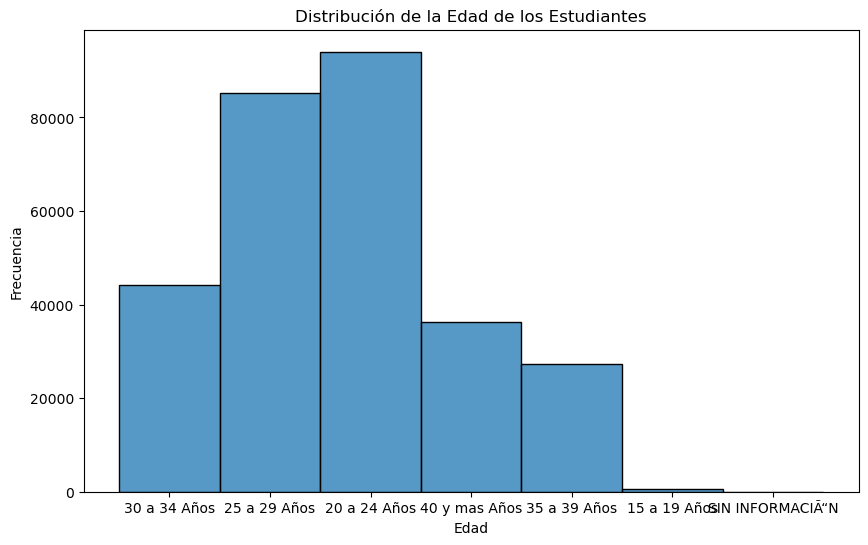

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rango_edad'], bins=30)
plt.title('Distribución de la Edad de los Estudiantes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

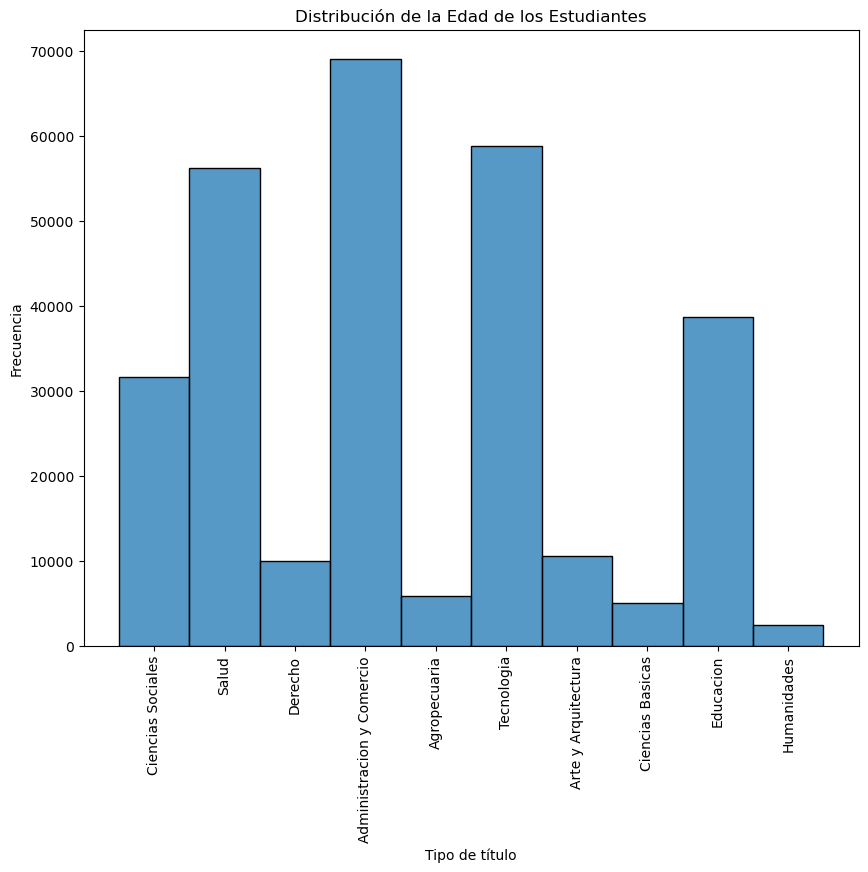

In [66]:
plt.figure(figsize=(10, 8))
sns.histplot(df['area_cineunesco'], bins=30)
plt.title('Distribución de la Edad de los Estudiantes')
plt.xlabel('Tipo de título')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia')
plt.show()

La exploración inicial de los datos mediante histogramas ha arrojado luz sobre dos aspectos clave para el Análisis Exploratorio de Datos: la edad de los titulados y sus preferencias en cuanto a la elección de carrera. Los hallazgos preliminares indican que:

* La mayoría de los estudiantes que obtienen su título tienen edades comprendidas entre los 20 y 29 años, lo que sugiere una población estudiantil relativamente joven al momento de la titulación.

* Las carreras en el ámbito de Administración y Comercio atraen a un número considerable de estudiantes, destacando su popularidad. Las áreas de Salud y Tecnología también presentan una significativa preferencia entre los titulados. Cabe destacar que este análisis es preliminar y no distingue entre los distintos niveles académicos, como títulos de grado o postgrados.

In [50]:
df['nivel_carrera_2'].unique()

array(['Magister', 'Carreras Profesionales', 'Postitulo',
       'Carreras Tecnicas', 'Doctorado'], dtype=object)

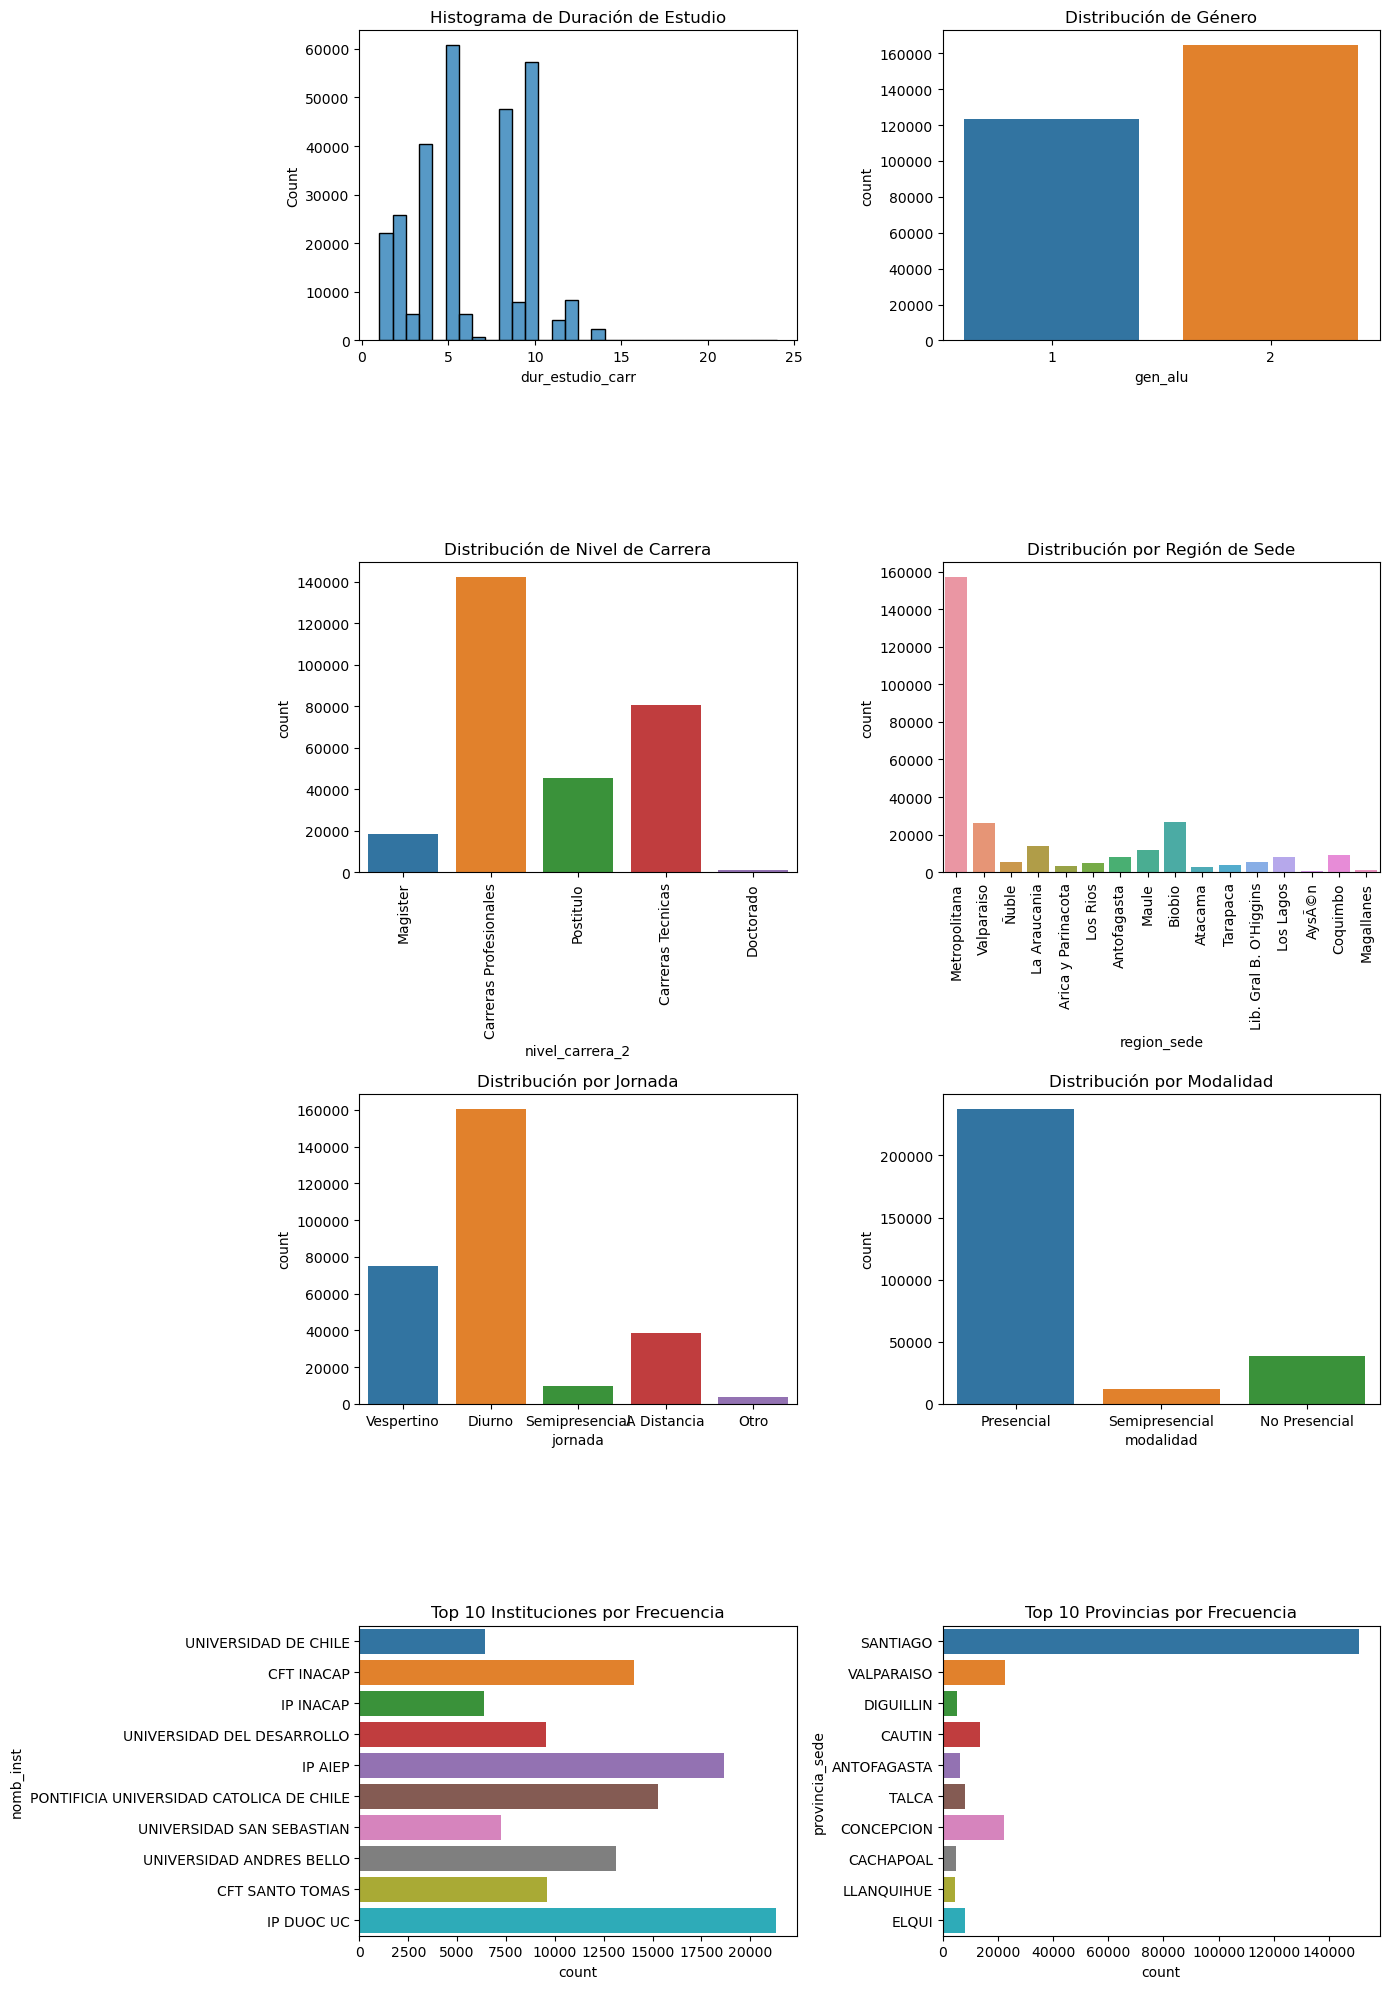

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))  # Ajusta el número de filas y columnas según tus necesidades

sns.histplot(df['dur_estudio_carr'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Histograma de Duración de Estudio')

sns.countplot(x='gen_alu', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Género')

sns.countplot(x='nivel_carrera_2', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Nivel de Carrera')
axes[1, 0].tick_params(axis='x', rotation=90)  # Rota las etiquetas si es necesario

sns.countplot(x='region_sede', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribución por Región de Sede')
axes[1, 1].tick_params(axis='x', rotation=90)  # Rota las etiquetas si es necesario

sns.countplot(x='jornada', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Distribución por Jornada')

sns.countplot(x='modalidad', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Distribución por Modalidad')

# Se consideran las top 10 instituciones y provincias dada la gran cantidad de resultados a obtener.

top_nomb_inst = df['nomb_inst'].value_counts().index[:10]
sns.countplot(y='nomb_inst', data=df[df['nomb_inst'].isin(top_nomb_inst)], ax=axes[3, 0])
axes[3, 0].set_title('Top 10 Instituciones por Frecuencia')

top_provincia_sede = df['provincia_sede'].value_counts().index[:10]
sns.countplot(y='provincia_sede', data=df[df['provincia_sede'].isin(top_provincia_sede)], ax=axes[3, 1])
axes[3, 1].set_title('Top 10 Provincias por Frecuencia')

plt.tight_layout()  # Ajusta el layout para evitar superposiciones
plt.show()


La siguiente fase del análisis consistió en la generación de una serie de histogramas para examinar las tendencias generales en las preferencias y elecciones de los estudiantes, considerando variables como la región de estudio, la institución educativa, la modalidad de estudio, la jornada y el género. Los insights obtenidos incluyen:

* Se confirmó la tendencia esperada de que las carreras profesionales y técnicas son las opciones predominantes, reflejando una mayor frecuencia de inscripción en comparación con los estudios de posgrado, como magísteres y doctorados, que presentan un volumen menor.
* La región Metropolitana sobresale notablemente en términos de matrículas, acumulando una cantidad significativamente mayor de estudiantes en comparación con otras regiones. No obstante, las regiones de Valparaíso y Biobío también se destacan por su afluencia estudiantil.
* En relación con el horario de las clases, la mayoría de los titulados provienen de carreras diurnas, aunque la modalidad vespertina representa una proporción sustancial, aproximándose a la mitad de los estudiantes diurnos.
* La modalidad presencial es la más común entre los estudiantes; sin embargo, es importante considerar que este patrón puede estar más influenciado por la oferta limitada de programas no presenciales por parte de las instituciones que por una preferencia explícita de los estudiantes.
* En cuanto a las instituciones educativas, los institutos profesionales Duoc UC y AIEP se destacan por tener el mayor número de titulados en 2022, seguidos de cerca por la Universidad Católica de Chile, INACAP y la Universidad Andrés Bello. Es notable la preeminencia numérica de los institutos profesionales en este análisis.

In [60]:
df['region_sede'] = df['region_sede'].str.replace('AYSEN', 'Aysen', regex=True)

#### Cantidad de alumnos titulados por área y region:

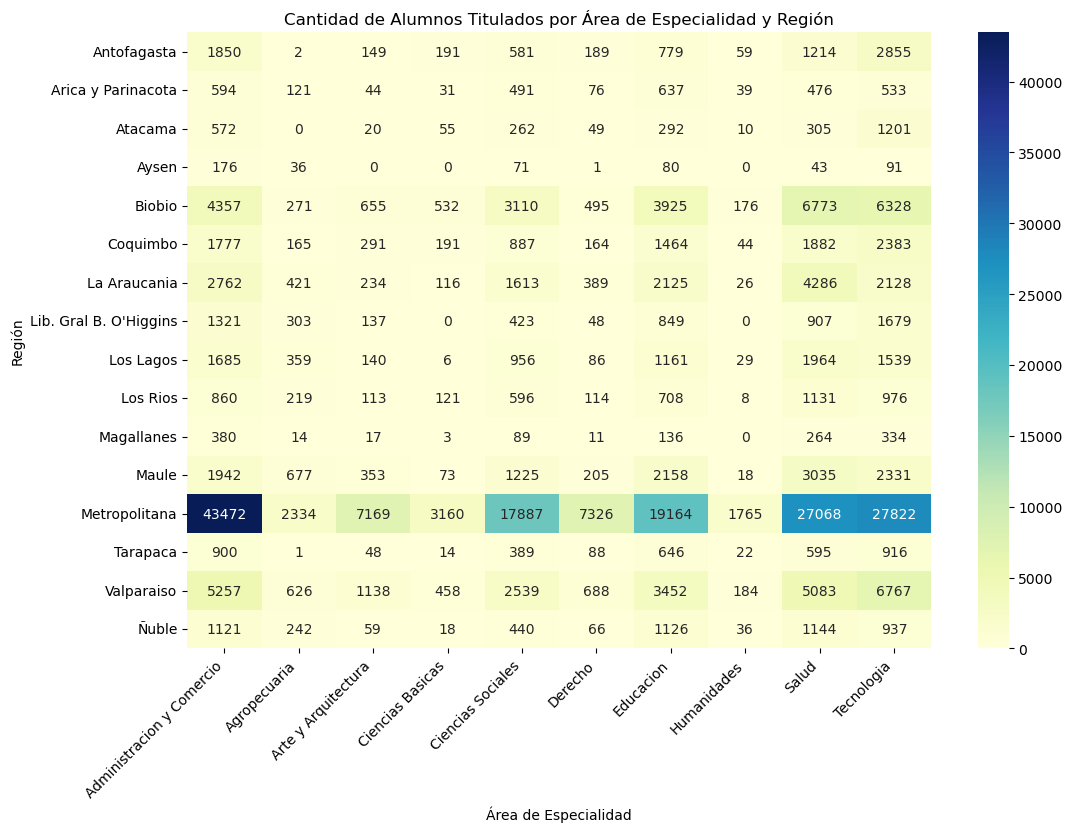

In [61]:
region_especialidad = pd.crosstab(df['region_sede'], df['area_cineunesco'])

plt.figure(figsize=(12, 8))
sns.heatmap(region_especialidad, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Cantidad de Alumnos Titulados por Área de Especialidad y Región')
plt.xlabel('Área de Especialidad')
plt.ylabel('Región')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

El examen detallado de la distribución de los alumnos titulados por área de especialidad y región revela una marcada preferencia por la Región Metropolitana, que acapara la mayor proporción de estudiantes. 

Un hallazgo notable es la inclinación de los estudiantes en La Araucanía hacia el campo de la Salud, mientras que en Antofagasta se observa un marcado interés por la Tecnología. De manera similar, la Región del Maule muestra una significativa orientación hacia estudios relacionados con la Salud.

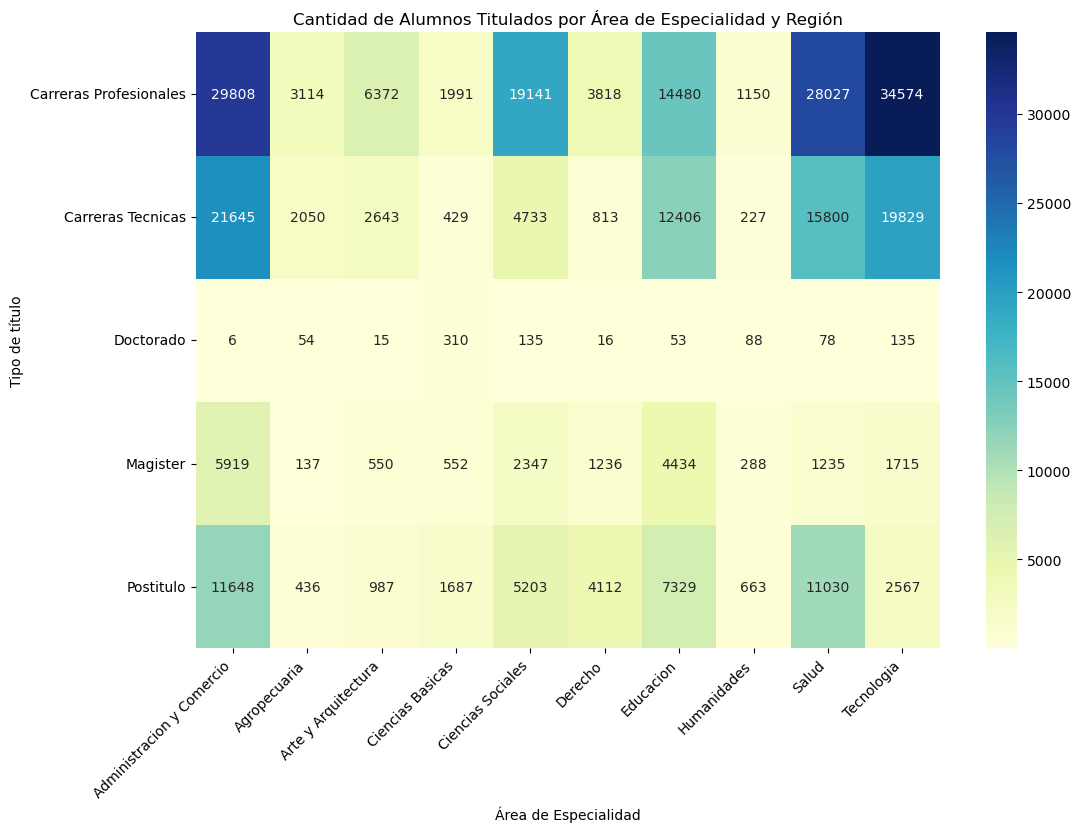

In [62]:
nivel_area = pd.crosstab(df['nivel_carrera_2'], df['area_cineunesco'])

plt.figure(figsize=(12, 8))
sns.heatmap(nivel_area, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Cantidad de Alumnos Titulados por Área de Especialidad y Región')
plt.xlabel('Área de Especialidad')
plt.ylabel('Tipo de título')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [63]:
nivel_area

area_cineunesco,Administracion y Comercio,Agropecuaria,Arte y Arquitectura,Ciencias Basicas,Ciencias Sociales,Derecho,Educacion,Humanidades,Salud,Tecnologia
nivel_carrera_2,,,,,,,,,,
Carreras Profesionales,29808,3114,6372,1991,19141,3818,14480,1150,28027,34574
Carreras Tecnicas,21645,2050,2643,429,4733,813,12406,227,15800,19829
Doctorado,6,54,15,310,135,16,53,88,78,135
Magister,5919,137,550,552,2347,1236,4434,288,1235,1715
Postitulo,11648,436,987,1687,5203,4112,7329,663,11030,2567


In [64]:
totals = nivel_area.sum(axis=1)
percentages = nivel_area.div(totals, axis=0) * 100
percentages

area_cineunesco,Administracion y Comercio,Agropecuaria,Arte y Arquitectura,Ciencias Basicas,Ciencias Sociales,Derecho,Educacion,Humanidades,Salud,Tecnologia
nivel_carrera_2,,,,,,,,,,
Carreras Profesionales,20.921565,2.185647,4.472364,1.397438,13.434638,2.679768,10.163187,0.807159,19.671521,24.266713
Carreras Tecnicas,26.863171,2.544213,3.280174,0.532423,5.874030,1.008998,15.396835,0.281725,19.609060,24.609370
Doctorado,0.674157,6.067416,1.685393,34.831461,15.168539,1.797753,5.955056,9.887640,8.764045,15.168539
Magister,32.145767,0.744040,2.987020,2.997882,12.746429,6.712649,24.080812,1.564112,6.707218,9.314072
Postitulo,25.509176,0.954842,2.161535,3.694538,11.394595,9.005300,16.050545,1.451973,24.155753,5.621742


Antes de concluir nuestro análisis, resultó particularmente revelador examinar cómo se distribuyen las preferencias de los estudiantes en función del nivel de titulación.

* Al analizar los magísteres, observamos que un notable 32,14% de los estudiantes optó por especializaciones en el área de Administración y Negocios, seguido por un 24,08% que prefirió el campo de la Educación, destacándose estos como los sectores más populares.
* En cuanto a los Doctorados, las Ciencias Básicas sobresalen, atrayendo al 34,83% del total de doctorandos, lo que subraya una fuerte inclinación hacia la investigación fundamental en este nivel de estudios.
* Las carreras técnicas muestran una preferencia significativa por Administración y Negocios y Tecnología, con un 26.86% y un 24.60% del total, respectivamente, evidenciando la demanda de habilidades aplicadas en estos campos.
* Por último, los postítulos en Administración y Negocios, así como en Salud, representan cada uno el 25,50% y 24.15%, similar a la tendencia observada en las carreras profesionales, lo que refleja un interés continuo en estas áreas.

In [65]:
region_nivel = pd.crosstab(df['region_sede'], df['nivel_carrera_2'])
region_nivel

nivel_carrera_2,Carreras Profesionales,Carreras Tecnicas,Doctorado,Magister,Postitulo
region_sede,,,,,
Antofagasta,4432,3119,19,154,145
Arica y Parinacota,1687,1280,0,74,1
Atacama,1300,1404,1,19,42
Aysen,133,365,0,0,0
Biobio,14829,8421,115,1353,1904
Coquimbo,4594,4148,11,170,325
La Araucania,6557,3596,39,671,3237
Lib. Gral B. O'Higgins,2539,3128,0,0,0
Los Lagos,4071,3516,7,202,129


En última instancia, al enfocarnos en los estudios de posgrado, se aprecia claramente que las regiones de Valparaíso y Biobío siguen a la Región Metropolitana en términos de popularidad, casi sin excepción, en lo que respecta a la elección de tipos de títulos.

## Conclusión:

Este análisis exploratorio de los datos sobre titulados de educación superior en Chile ha revelado varias tendencias significativas y preferencias entre los estudiantes, iluminando patrones clave en la elección de carrera, región de estudio, y nivel de titulación. La Región Metropolitana emerge como el epicentro educativo, concentrando la mayor cantidad de estudiantes, lo cual resalta su rol central en el paisaje educativo del país. Específicamente, las áreas de Administración y Negocios, Salud y Tecnología dominan las preferencias de estudio, reflejando las tendencias actuales del mercado laboral y los intereses académicos.

Al profundizar en los niveles de titulación, se destaca una inclinación notable hacia las carreras técnicas y profesionales, con una preferencia marcada por la Administración y Negocios, seguido de cerca por campos como la Salud y la Tecnología. Los estudios de posgrado, aunque menos numerosos, muestran una preferencia por áreas especializadas, con los magísteres inclinándose hacia Administración y Educación, y los doctorados hacia las Ciencias Básicas. Esto refleja un compromiso continuo con la formación avanzada y la investigación en campos fundamentales para el desarrollo del país.

Las regiones de Valparaíso y Biobío se destacan como centros educativos importantes después de la Región Metropolitana, evidenciando una distribución geográfica medianamente diversificada de la oferta educativa superior en Chile. Sin embargo, la concentración de estudiantes en la capital sugiere oportunidades y desafíos para la descentralización educativa y el acceso equitativo a la educación superior en todo el país.

En conclusión, este estudio no solo subraya las preferencias y tendencias actuales entre los titulados de educación superior en Chile sino que también señala hacia futuras direcciones para el desarrollo educativo, la inversión en áreas de creciente interés y la necesidad de fomentar una distribución más equitativa de oportunidades educativas a lo largo de todo el territorio nacional.